# PCA

### PCA 플로우

* 데이터 나열
* 데이터 중심 정하기
* 데이터의 중심으로 원점 이동
* 원점 지나는 직선 그리기(Randomly)
* 데이터에 fit한 직선으로 회전(최소거리 d)
* Scaling으로 EigenVector 만들기
* PC-n의 진행
* 각 PC축 회전
* 데이터 복원

-------------------------

### PCA 플로우 AS Coding

1. 필요한 Python 패키지(numpy, pandas 등) 임포트
2. 전체 dataset 로드
3. dataset에서 Dimension Reduction에 사용할 Feature 선택
4. 선택 데이터의 covariance matrix 연산 & 확인
5. covariance matrix의 eigen value와 eigen vector 값 확인
6. eigen value와 eigen vector를 ascending sort(내림차순 정렬)
7. dataset의 total covariance 백분율로 eigen value 연산 및 확인
8. Minimum composition variance 구성에 필요한 eigen value 및 eigen vector 선택
9. 선택 eigen vector X Dataset을 통해 PCA 완료
10. PCA 결과 Plotting

### 1. 필요한 Python 패키지(numpy, pandas 등) 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. 전체 dataset 로드

In [2]:
# define dataframe

df = pd.read_csv('data/iris_sample_data.csv', header=None,
                 names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Specis'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Specis
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. dataset에서 Dimension Reduction에 사용할 Feature 선택

In [3]:
# only showing column of 'Sepal Length' and 'Sepal Width'

df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


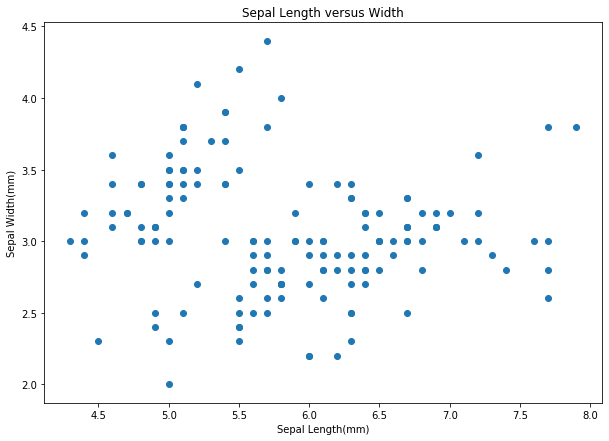

In [4]:
# visualize the dataset by plotting
# data of the Sepal Length Vs Sepal Width

plt.figure(figsize=(10, 7))
plt.scatter(df['Sepal Length'], df['Sepal Width']);
plt.xlabel('Sepal Length(mm)');
plt.ylabel('Sepal Width(mm)');
plt.title('Sepal Length versus Width');

### 4. 선택 데이터의 covariance matrix 연산 & 확인

In [5]:
# the mean, std, variance, covariance value w/pandas

print(df.mean())
print('------------------------------------')
print(df.std())
print('------------------------------------')
print(df.var())
print('------------------------------------')
print(df.cov())

Sepal Length    5.843333
Sepal Width     3.054000
dtype: float64
------------------------------------
Sepal Length    0.828066
Sepal Width     0.433594
dtype: float64
------------------------------------
Sepal Length    0.685694
Sepal Width     0.188004
dtype: float64
------------------------------------
              Sepal Length  Sepal Width
Sepal Length      0.685694    -0.039268
Sepal Width      -0.039268     0.188004


In [6]:
# the mean, std, variance, covariance value w/numpy

print(np.mean(df.values, axis=0))
print('------------------------------------')
print(np.std(df.values, axis=0))
print('------------------------------------')
print(np.var(df.values, axis=0))
print('------------------------------------')
print(np.cov(df.values.T))

[5.84333333 3.054     ]
------------------------------------
[0.82530129 0.43214658]
------------------------------------
[0.68112222 0.18675067]
------------------------------------
[[ 0.68569351 -0.03926846]
 [-0.03926846  0.18800403]]


### 5. covariance matrix의 eigen value와 eigen vector 값 확인 & 6. eigen value와 eigen vector를 descending sort(내림차순 정렬)

참고 : https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [7]:
# the covariance matrix for the selected data
# transpose is required to ensure the covariance matrix is based on features, not samples data

data = np.cov(df.values.T)
data

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [8]:
# eigenvalues and eigenvectors w/numpy

eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)     # full_matrics=False : 축소형

In [9]:
# printout eigenvalues

eigenvalues

array([0.6887728 , 0.18492474])

In [10]:
# eigenvalues as a percentage of the total variance
# eigenvalues 'cumulative sum' function in numpy

eigenvalues = np.cumsum(eigenvalues)
eigenvalues

array([0.6887728 , 0.87369754])

In [11]:
# printout eigenvectors

eigenvectors

array([[-0.99693955,  0.07817635],
       [ 0.07817635,  0.99693955]])

In [12]:
# the shape of the eigenvector matrix

eigenvectors.shape

(2, 2)

### 7. dataset의 total covariance 백분율로 eigen value 연산 및 확인

In [13]:
# eigenvalues as a percentage of the variance w/dataset

# eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.78834238, 1.        ])

### 8. Minimum composition variance 구성에 필요한 eigen value 및 eigen vector 선택

In [14]:
# values for the first eigenvector in the eigenvector matrix

p = eigenvectors[0]
p

array([-0.99693955,  0.07817635])

### 9. 선택 eigen vector X Dataset을 통해 PCA 완료

In [15]:
# matrix multiplication of the pricipal component with the transpose of the dataset
# without transpose, multiplication could not occur

X_T_P = p.dot(df.values.T)
X_T_P

array([-4.81077444, -4.65047471, -4.43545153, -4.34357521, -4.70326285,
       -5.07858577, -4.32012231, -4.71889812, -4.15982257, -4.64265708,
       -5.09422104, -4.51951021, -4.55078076, -4.05231098, -5.46954395,
       -5.33857945, -5.07858577, -4.81077444, -5.38548526, -4.78732154,
       -5.11767394, -4.79513917, -4.30448703, -4.82640971, -4.51951021,
       -4.75016867, -4.71889812, -4.9104684 , -4.91828603, -4.43545153,
       -4.54296312, -5.11767394, -4.86356259, -5.15482681, -4.64265708,
       -4.73453339, -5.20955026, -4.64265708, -4.15200494, -4.81859208,
       -4.71108049, -4.30642234, -4.13636967, -4.71108049, -4.78732154,
       -4.55078076, -4.78732154, -4.33575758, -4.99452708, -4.72671576,
       -6.72841249, -6.13024876, -6.63653617, -5.30336189, -6.26121325,
       -5.46366162, -6.02273717, -4.69738052, -6.35308957, -4.97300948,
       -4.82834502, -5.64741426, -5.80964929, -5.8546198 , -5.35615003,
       -6.43714826, -5.34833239, -5.57117321, -6.0090372 , -5.38

### 10. PCA 결과 Plotting

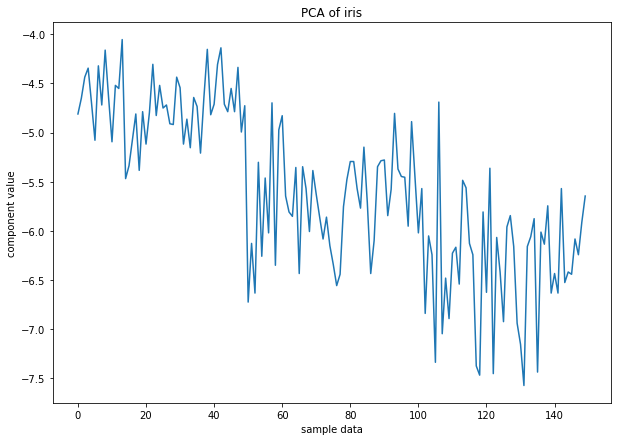

In [16]:
# plotting

plt.figure(figsize=(10, 7))
plt.plot(X_T_P);
plt.title('PCA of iris');
plt.xlabel('sample data');
plt.ylabel('component value');